In [1]:
import pandas as pd
import geopandas as gpd
import sys
sys.path.append('../lib/')
import matplotlib.pyplot as plt
import math


import workers as workers
import sweden as sweden

In [2]:
result = pd.read_csv('../results/flows_1km_10km_sweden.csv')
grids = gpd.read_file("../results/grids_sweden/grids_1km_density_deso_with_10km_upper_grids.shp")

In [3]:
result.head()

,ozone,dzone,d_ij,D_ij_data,D_ij_sim,v_ij,grid_type
0,18,18,0.000000,0.000000,0.000000,0.000000,1
1,18,8,2.236068,1.639817,1.457747,43.436840,1
2,18,20,2.000000,1.648406,1.484936,54.296050,1
3,18,19,1.000000,1.960368,1.740077,217.184198,1
4,18,1,4.472136,1.534267,1.338410,10.859210,1


In [4]:
gdf_zones = gpd.read_file("../dbs/sweden/zones/DeSO/DeSO_2018_v2.shp")

In [5]:
grids.head()

,zone,deso,density,upper_deso,upper_dens,upper_zone,upper_xcoo,upper_ycoo,geometry
0,18,0114A0010,15.720316,0114A0010,15.720316,1,655000.0,6595000.0,"POLYGON ((660000.000 6596000.000, 660000.000 6..."
1,8,0114A0010,15.720316,0114A0010,15.720316,1,655000.0,6595000.0,"POLYGON ((659000.000 6598000.000, 659000.000 6..."
2,20,0114A0010,15.720316,0114A0010,15.720316,1,655000.0,6595000.0,"POLYGON ((660000.000 6598000.000, 660000.000 6..."
3,19,0114A0010,15.720316,0114A0010,15.720316,1,655000.0,6595000.0,"POLYGON ((660000.000 6597000.000, 660000.000 6..."
4,1,0114A0010,15.720316,0114A0010,15.720316,1,655000.0,6595000.0,"POLYGON ((658000.000 6600000.000, 658000.000 6..."


In [6]:
agg_level=4

In [7]:
grids_dict = dict(zip(grids.zone, grids.deso))

In [8]:
result.loc[:,'ozone_deso'] = result.loc[:, 'ozone'].map(grids_dict).apply(lambda x: x[:agg_level])

In [9]:
result.loc[:,'dzone_deso'] = result.loc[:, 'dzone'].map(grids_dict).apply(lambda x: x[:agg_level])

In [10]:
result

,ozone,dzone,d_ij,D_ij_data,D_ij_sim,v_ij,grid_type,ozone_deso,dzone_deso
0,18,18,0.000000,0.000000,0.000000,0.000000,1,0114,0114
1,18,8,2.236068,1.639817,1.457747,43.436840,1,0114,0114
2,18,20,2.000000,1.648406,1.484936,54.296050,1,0114,0114
3,18,19,1.000000,1.960368,1.740077,217.184198,1,0114,0114
4,18,1,4.472136,1.534267,1.338410,10.859210,1,0114,0114
...,...,...,...,...,...,...,...,...,...
72778292,5028,5024,14.142136,1.404068,1.234242,88.768872,10,0136,0136
72778293,5028,5025,10.000000,1.434981,1.263294,177.537744,10,0136,0136
72778294,5028,5026,14.142136,1.404068,1.234242,88.768872,10,0136,0136
72778295,5028,5027,10.000000,1.434981,1.263294,177.537744,10,0136,0136


In [11]:
result_1 = result.groupby(['ozone_deso', 'dzone_deso'])[ 'v_ij'].sum().reset_index()

In [12]:
result_1

,ozone_deso,dzone_deso,v_ij
0,0114,0114,1.328431e+08
1,0114,0115,2.557794e+07
2,0114,0117,4.094059e+06
3,0114,0120,1.368843e+07
4,0114,0123,4.911734e+05
...,...,...,...
2117,2583,2518,5.234224e+03
2118,2583,2583,9.534196e+05
2119,2584,2521,4.155623e+03
2120,2584,2523,6.283611e+03


In [13]:
result_2 = result.groupby(['ozone_deso', 'dzone_deso'])[ 'd_ij'].sum().reset_index()

In [14]:
result_3 = result.groupby(['ozone_deso', 'dzone_deso'])[ 'D_ij_data'].sum().reset_index()

In [15]:
result_4 = result.groupby(['ozone_deso', 'dzone_deso'])[ 'D_ij_sim'].sum().reset_index()

In [16]:
result_4

,ozone_deso,dzone_deso,D_ij_sim
0,0114,0114,2.402718e+04
1,0114,0115,6.314117e+04
2,0114,0117,1.103665e+05
3,0114,0120,3.020569e+05
4,0114,0123,1.729159e+04
...,...,...,...
2117,2583,2518,7.163742e+03
2118,2583,2583,1.714444e+05
2119,2584,2521,2.752290e+04
2120,2584,2523,3.866978e+04


In [17]:
grids_big = gpd.read_file("../dbs/sweden/zones/Deso/DeSO_2018_v2.shp")

In [18]:
grids_big.head()

,id,objectid,uuid,deso,befolkning,version,geometry
0,1.0,1,{D9661502-EE24-45AE-A1F7-C1C80F463556},0114A0010,790,2018_v2,"POLYGON ((661116.252 6606615.603, 661171.409 6..."
1,2.0,2,{5EA47309-A001-4E2A-843E-02EC8F544E4C},0114C1010,1608,2018_v2,"POLYGON ((666960.066 6598800.393, 666971.371 6..."
2,3.0,3,{0DA292ED-A306-4D7E-A392-BD063A3093E1},0114C1020,1610,2018_v2,"POLYGON ((667034.814 6600076.634, 667032.984 6..."
3,4.0,4,{18583EFC-ECC1-4D27-B520-DA294F5658FD},0114C1030,2365,2018_v2,"POLYGON ((667095.512 6599103.521, 667095.009 6..."
4,5.0,5,{6574A7B3-AD12-4A81-8EAC-773B976B72BC},0114C1040,2346,2018_v2,"POLYGON ((664610.264 6600922.821, 664638.910 6..."


In [19]:
grids_big.loc[:,'upper_deso'] = grids_big.loc[:, 'deso'].apply(lambda x: x[0:4])

In [20]:
grids_big_use = grids_big.dissolve(by='upper_deso', aggfunc='sum')

In [21]:
grids_big_use

,geometry,id,objectid,befolkning
upper_deso,,,,
0114,"POLYGON ((664663.631 6597477.443, 664653.118 6...",276.0,276,46786
0115,"POLYGON ((675775.690 6600118.275, 675631.701 6...",627.0,627,34090
0117,"POLYGON ((686822.565 6592520.451, 686041.700 6...",1242.0,1242,45574
0120,"POLYGON ((697939.414 6569646.878, 697846.459 6...",1860.0,1860,45000
0123,"POLYGON ((659903.355 6587815.099, 659877.356 6...",4380.0,4380,79990
...,...,...,...,...
2580,"POLYGON ((800857.314 7287900.809, 799591.866 7...",271147.0,271147,78105
2581,"POLYGON ((793300.542 7241240.406, 793295.100 7...",166082.0,166082,42281
2582,"POLYGON ((811093.111 7304243.942, 811106.486 7...",107181.0,107181,28080


In [22]:
upper_deso_name = list(grids_big_use.index.array)

In [23]:
dis = dict()
for i in upper_deso_name:
    element = dict()
    for j in upper_deso_name:
        delta_x = grids_big_use.geometry.loc[i].centroid.x -  grids_big_use.geometry.loc[j].centroid.x
        delta_y = grids_big_use.geometry.loc[i].centroid.y -  grids_big_use.geometry.loc[j].centroid.y
        distance = delta_x * delta_x + delta_y * delta_y
        element[j] = pow(distance, 0.5)
    dis[i] = element

In [24]:
result_1.loc[:,'distance'] = 0
result_2.loc[:,'distance'] = 0
result_3.loc[:,'distance'] = 0
result_4.loc[:,'distance'] = 0

In [25]:
result_1.head()

,ozone_deso,dzone_deso,v_ij,distance
0,0114,0114,1.328431e+08,0
1,0114,0115,2.557794e+07,0
2,0114,0117,4.094059e+06,0
3,0114,0120,1.368843e+07,0
4,0114,0123,4.911734e+05,0


In [26]:
for i in result_1.index:
    result_1.loc[i, 'distance'] = dis[result_1.loc[i, 'ozone_deso']][result_1.loc[i, 'dzone_deso']]
for i in result_2.index:
    result_2.loc[i, 'distance'] = dis[result_2.loc[i, 'ozone_deso']][result_2.loc[i, 'dzone_deso']]
for i in result_3.index:
    result_3.loc[i, 'distance'] = dis[result_3.loc[i, 'ozone_deso']][result_3.loc[i, 'dzone_deso']]
for i in result_4.index:
    result_4.loc[i, 'distance'] = dis[result_4.loc[i, 'ozone_deso']][result_4.loc[i, 'dzone_deso']]

In [27]:
result_1

,ozone_deso,dzone_deso,v_ij,distance
0,0114,0114,1.328431e+08,0.000000
1,0114,0115,2.557794e+07,18159.440980
2,0114,0117,4.094059e+06,36988.166911
3,0114,0120,1.368843e+07,56218.609477
4,0114,0123,4.911734e+05,10968.190328
...,...,...,...,...
2117,2583,2518,5.234224e+03,77605.749310
2118,2583,2583,9.534196e+05,0.000000
2119,2584,2521,4.155623e+03,132290.030752
2120,2584,2523,6.283611e+03,100904.279948


In [29]:
distance_threshold = list(result_1['distance'].quantile( q=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]))

In [30]:
distance_threshold

[0.0,
 15132.638559499781,
 21402.830230160056,
 25920.399064785524,
 30364.88402831512,
 34719.66671076114,
 39915.95671982414,
 47372.45491507817,
 62890.4022520481,
 155899.8810224734]

In [31]:
result_1.loc[:,'level'] = 0
result_2.loc[:,'level'] = 0
result_3.loc[:,'level'] = 0
result_4.loc[:,'level'] = 0

In [32]:
def get_level(dp, d):
    level_result = 1
    for ddpp in dp:
        if d > ddpp:
            level_result = level_result + 1
        else:
            break
    return level_result

In [35]:
l = get_level(distance_threshold, result_1.distance.max())

In [36]:
print(l)

10


In [37]:
for i in result_1.index:
    result_1.loc[i, 'level'] = get_level(  distance_threshold, result_1.loc[i, 'distance'])
for i in result_2.index:
    result_2.loc[i, 'level'] = get_level(  distance_threshold, result_2.loc[i, 'distance'])
for i in result_3.index:
    result_3.loc[i, 'level'] = get_level(  distance_threshold, result_3.loc[i, 'distance'])
for i in result_4.index:
    result_4.loc[i, 'level'] = get_level(  distance_threshold, result_4.loc[i, 'distance'])

In [38]:
result_1

,ozone_deso,dzone_deso,v_ij,distance,level
0,0114,0114,1.328431e+08,0.000000,1
1,0114,0115,2.557794e+07,18159.440980,3
2,0114,0117,4.094059e+06,36988.166911,7
3,0114,0120,1.368843e+07,56218.609477,9
4,0114,0123,4.911734e+05,10968.190328,2
...,...,...,...,...,...
2117,2583,2518,5.234224e+03,77605.749310,10
2118,2583,2583,9.534196e+05,0.000000,1
2119,2584,2521,4.155623e+03,132290.030752,10
2120,2584,2523,6.283611e+03,100904.279948,10


In [41]:
flows_gt = pd.DataFrame(pd.read_csv('../results/ODM_GT.csv', converters={u'ozone_deso':str, u'dzone_deso':str, u'v_ij_gt':float}))

In [42]:
flows_comparison = flows_gt.loc[flows_gt['v_ij_gt'] != 0, :].merge(result_1, on=['ozone_deso', 'dzone_deso'], how='inner')
flows_comparison.loc[:, 'v_ij_gt'] = flows_comparison.loc[:, 'v_ij_gt'] #/ flows_comparison.loc[:, 'v_ij_gt'].sum()
flows_comparison.loc[:, 'v_ij'] = flows_comparison.loc[:, 'v_ij'] #/ flows_comparison.loc[:, 'v_ij'].sum()
flows_comparison.head()

,ozone_deso,dzone_deso,v_ij_gt,v_ij,distance,level
0,0114,0114,5.144816e+07,1.328431e+08,0.000000,1
1,0114,0115,2.166490e+05,2.557794e+07,18159.440980,3
2,0114,0117,5.804400e+05,4.094059e+06,36988.166911,7
3,0114,0123,5.046360e+05,4.911734e+05,10968.190328,2
4,0114,0125,2.617775e+04,9.221300e+05,23796.622868,4


In [85]:
level_percent = 2
flows_comparison_level = flows_comparison[flows_comparison['level'] == level_percent]

In [86]:
flows_comparison_level.loc[:, 'v_ij_gt'] = flows_comparison_level.loc[:, 'v_ij_gt'] / flows_comparison_level.loc[:, 'v_ij_gt'].sum()
flows_comparison_level.loc[:, 'v_ij'] = flows_comparison_level.loc[:, 'v_ij'] / flows_comparison_level.loc[:, 'v_ij'].sum()

C:\Users\cheng\AppData\Local\Temp\ipykernel_11460\3000085404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flows_comparison_level.loc[:, 'v_ij_gt'] = flows_comparison_level.loc[:, 'v_ij_gt'] / flows_comparison_level.loc[:, 'v_ij_gt'].sum()
C:\Users\cheng\AppData\Local\Temp\ipykernel_11460\3000085404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flows_comparison_level.loc[:, 'v_ij'] = flows_comparison_level.loc[:, 'v_ij'] / flows_comparison_level.loc[:, 'v_ij'].sum()


In [87]:
flows_comparison_level

,ozone_deso,dzone_deso,v_ij_gt,v_ij,distance,level
3,0114,0123,0.001323,0.013687,10968.190328,2
5,0114,0139,0.000197,0.001125,14355.346294,2
6,0114,0160,0.003462,0.003589,11281.065839,2
8,0114,0163,0.018685,0.028908,7952.327813,2
10,0114,0191,0.009777,0.005935,14167.681526,2
40,0123,0125,0.002549,0.021106,13211.058470,2
43,0123,0139,0.007487,0.018538,14018.265928,2
44,0123,0160,0.003947,0.000808,14787.054957,2
45,0123,0162,0.000668,0.000919,13747.198629,2
46,0123,0163,0.013642,0.024302,6668.082959,2


(1e-07, 0.1)

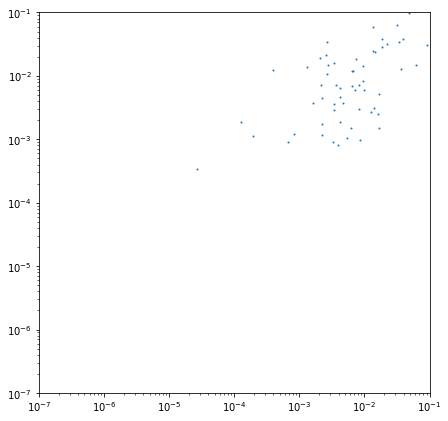

In [88]:
plt.figure(figsize=(7, 7))
plt.scatter(flows_comparison_level.loc[:, 'v_ij_gt'], flows_comparison_level.loc[:, 'v_ij'], s=1)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.0000001, 0.1)
plt.ylim(0.0000001, 0.1)

In [89]:
flows_comparison_level.loc[:, 'v_ij_min'] = flows_comparison_level.apply(lambda row: min(row['v_ij_gt'], row['v_ij']), axis=1)
SSI = 2 * flows_comparison_level.loc[:, 'v_ij_min'].sum() / \
      (flows_comparison_level.loc[:, 'v_ij_gt'].sum() + flows_comparison_level.loc[:, 'v_ij'].sum())
SSI

C:\Users\cheng\AppData\Local\Temp\ipykernel_11460\1389571067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flows_comparison_level.loc[:, 'v_ij_min'] = flows_comparison_level.apply(lambda row: min(row['v_ij_gt'], row['v_ij']), axis=1)


0.6453664692360352

In [109]:
result_vij_SSI = []
for level_percent in range(1, 11):
    flows_comparison_level = flows_comparison[flows_comparison['level'] == level_percent]
    flows_comparison_level.loc[:, 'v_ij_gt'] = flows_comparison_level.loc[:, 'v_ij_gt'] / flows_comparison_level.loc[:, 'v_ij_gt'].sum()
    flows_comparison_level.loc[:, 'v_ij'] = flows_comparison_level.loc[:, 'v_ij'] / flows_comparison_level.loc[:, 'v_ij'].sum()
    flows_comparison_level.loc[:, 'v_ij_min'] = flows_comparison_level.apply(lambda row: min(row['v_ij_gt'], row['v_ij']), axis=1)
    SSI = 2 * flows_comparison_level.loc[:, 'v_ij_min'].sum() / \
      (flows_comparison_level.loc[:, 'v_ij_gt'].sum() + flows_comparison_level.loc[:, 'v_ij'].sum())
    result_vij_SSI.append(SSI)

C:\Users\cheng\AppData\Local\Temp\ipykernel_11460\2030015068.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flows_comparison_level.loc[:, 'v_ij_gt'] = flows_comparison_level.loc[:, 'v_ij_gt'] / flows_comparison_level.loc[:, 'v_ij_gt'].sum()
C:\Users\cheng\AppData\Local\Temp\ipykernel_11460\2030015068.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flows_comparison_level.loc[:, 'v_ij'] = flows_comparison_level.loc[:, 'v_ij'] / flows_comparison_level.loc[:, 'v_ij'].sum()
C:\Users\cheng\AppData\Local\

In [110]:
result_vij_SSI

[0.5824540355191532,
 0.6453664692360352,
 0.3691398189145151,
 0.23820386687457715,
 0.525791176511397,
 0.6273739566945701,
 0.27102338494214273,
 0.26380968230513,
 0.1725168021078466,
 0.6800757165398266]

In [98]:
result_2

,ozone_deso,dzone_deso,d_ij,distance,level
0,0114,0114,8.830191e+05,0.000000,1
1,0114,0115,8.212582e+06,18159.440980,3
2,0114,0117,2.707418e+07,36988.166911,7
3,0114,0120,7.084904e+07,56218.609477,9
4,0114,0123,5.966550e+06,10968.190328,2
...,...,...,...,...,...
2117,2583,2518,3.494820e+04,77605.749310,10
2118,2583,2583,6.245237e+05,0.000000,1
2119,2584,2521,1.487518e+05,132290.030752,10
2120,2584,2523,1.877940e+05,100904.279948,10


In [99]:
demand_d_gt = pd.DataFrame(pd.read_csv('../results/demand_d_GT.csv', converters={u'ozone_deso':str, u'dzone_deso':str, u'd_ij_gt':float}))

In [100]:
demand_d_gt.head()

,ozone_deso,dzone_deso,d_ij_gt
0,0114,0114,5.951112e+07
1,0114,0115,1.752398e+06
2,0114,0117,1.281179e+07
3,0114,0120,0.000000e+00
4,0114,0123,5.125630e+06


In [102]:
demand_d_comparison = demand_d_gt.loc[demand_d_gt['d_ij_gt'] != 0, :].merge(result_2, on=['ozone_deso', 'dzone_deso'], how='inner')
demand_d_comparison.head()

,ozone_deso,dzone_deso,d_ij_gt,d_ij,distance,level
0,0114,0114,5.951112e+07,8.830191e+05,0.000000,1
1,0114,0115,1.752398e+06,8.212582e+06,18159.440980,3
2,0114,0117,1.281179e+07,2.707418e+07,36988.166911,7
3,0114,0123,5.125630e+06,5.966550e+06,10968.190328,2
4,0114,0125,7.097814e+05,2.775978e+07,23796.622868,4


In [107]:
result_dij_SSI = []
for level_percent in range(1, 11):
    comparison_level = demand_d_comparison[demand_d_comparison['level'] == level_percent]
    comparison_level.loc[:, 'd_ij_gt'] = comparison_level.loc[:, 'd_ij_gt'] / comparison_level.loc[:, 'd_ij_gt'].sum()
    comparison_level.loc[:, 'd_ij'] = comparison_level.loc[:, 'd_ij'] / comparison_level.loc[:, 'd_ij'].sum()
    comparison_level.loc[:, 'd_ij_min'] = comparison_level.apply(lambda row: min(row['d_ij_gt'], row['d_ij']), axis=1)
    SSI = 2 * comparison_level.loc[:, 'd_ij_min'].sum() / \
      (comparison_level.loc[:, 'd_ij_gt'].sum() + comparison_level.loc[:, 'd_ij'].sum())
    result_dij_SSI.append(SSI)

C:\Users\cheng\AppData\Local\Temp\ipykernel_11460\2764746414.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_level.loc[:, 'd_ij_gt'] = comparison_level.loc[:, 'd_ij_gt'] / comparison_level.loc[:, 'd_ij_gt'].sum()
C:\Users\cheng\AppData\Local\Temp\ipykernel_11460\2764746414.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_level.loc[:, 'd_ij'] = comparison_level.loc[:, 'd_ij'] / comparison_level.loc[:, 'd_ij'].sum()
C:\Users\cheng\AppData\Local\Temp\ipykernel_11460\2764746414.py:6

In [111]:
result_dij_SSI

[0.11641291380124107,
 0.048516258061614324,
 0.1417412617806082,
 0.021354159787655064,
 0.03297815394657181,
 0.03024098964186085,
 0.050884772649597065,
 0.0527597875355592,
 0.01915965267551236,
 0.6234677320890577]

In [55]:
result_3

,ozone_deso,dzone_deso,D_ij_data,distance,level
0,0114,0114,2.619493e+04,0.000000,1
1,0114,0115,6.432122e+04,18159.440980,3
2,0114,0117,9.571095e+04,36988.166911,7
3,0114,0120,2.640998e+05,56218.609477,9
4,0114,0123,1.547686e+04,10968.190328,1
...,...,...,...,...,...
2117,2583,2518,8.181201e+03,77605.749310,9
2118,2583,2583,1.955127e+05,0.000000,1
2119,2584,2521,3.140845e+04,132290.030752,10
2120,2584,2523,4.415078e+04,100904.279948,10


In [112]:
demand_D_gt = pd.DataFrame(pd.read_csv('../results/demand_D_survey_GT.csv', converters={u'ozone_deso':str, u'dzone_deso':str, u'D_ij_gt':float}))

In [113]:
demand_D_gt.head()

,ozone_deso,dzone_deso,D_ij_gt
0,0114,0114,1.002903e+08
1,0114,0115,2.545650e+06
2,0114,0117,1.714140e+07
3,0114,0120,0.000000e+00
4,0114,0123,7.344664e+06


In [115]:
demand_D_comparison = demand_D_gt.loc[demand_D_gt['D_ij_gt'] != 0, :].merge(result_3, on=['ozone_deso', 'dzone_deso'], how='inner')
demand_D_comparison.head()

,ozone_deso,dzone_deso,D_ij_gt,D_ij_data,distance,level
0,0114,0114,1.002903e+08,26194.933363,0.000000,1
1,0114,0115,2.545650e+06,64321.223450,18159.440980,3
2,0114,0117,1.714140e+07,95710.947064,36988.166911,7
3,0114,0123,7.344664e+06,15476.855798,10968.190328,2
4,0114,0125,9.276339e+05,69248.858232,23796.622868,4


In [116]:
result_Dij_SSI = []
for level_percent in range(1, 11):
    comparison_level = demand_D_comparison[demand_D_comparison['level'] == level_percent]
    comparison_level.loc[:, 'D_ij_gt'] = comparison_level.loc[:, 'D_ij_gt'] / comparison_level.loc[:, 'D_ij_gt'].sum()
    comparison_level.loc[:, 'D_ij_data'] = comparison_level.loc[:, 'D_ij_data'] / comparison_level.loc[:, 'D_ij_data'].sum()
    comparison_level.loc[:, 'D_ij_min'] = comparison_level.apply(lambda row: min(row['D_ij_gt'], row['D_ij_data']), axis=1)
    SSI = 2 * comparison_level.loc[:, 'D_ij_min'].sum() / \
      (comparison_level.loc[:, 'D_ij_gt'].sum() + comparison_level.loc[:, 'D_ij_data'].sum())
    result_Dij_SSI.append(SSI)

C:\Users\cheng\AppData\Local\Temp\ipykernel_11460\2321207444.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_level.loc[:, 'D_ij_gt'] = comparison_level.loc[:, 'D_ij_gt'] / comparison_level.loc[:, 'D_ij_gt'].sum()
C:\Users\cheng\AppData\Local\Temp\ipykernel_11460\2321207444.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_level.loc[:, 'D_ij_data'] = comparison_level.loc[:, 'D_ij_data'] / comparison_level.loc[:, 'D_ij_data'].sum()
C:\Users\cheng\AppData\Local\Temp\ipykernel_11460\

In [117]:
result_Dij_SSI 

[0.40272676251231077,
 0.2948436533900838,
 0.4622857810021899,
 0.38044077186356867,
 0.4087552277558739,
 0.4172201063890154,
 0.4349323258789504,
 0.14174054706052308,
 0.2254834721889912,
 0.6200061125164329]

In [57]:
result_4

,ozone_deso,dzone_deso,D_ij_sim,distance,level
0,0114,0114,2.402718e+04,0.000000,1
1,0114,0115,6.314117e+04,18159.440980,3
2,0114,0117,1.103665e+05,36988.166911,7
3,0114,0120,3.020569e+05,56218.609477,9
4,0114,0123,1.729159e+04,10968.190328,1
...,...,...,...,...,...
2117,2583,2518,7.163742e+03,77605.749310,9
2118,2583,2583,1.714444e+05,0.000000,1
2119,2584,2521,2.752290e+04,132290.030752,10
2120,2584,2523,3.866978e+04,100904.279948,10


In [119]:
demand_D_sim_gt = pd.DataFrame(pd.read_csv('../results/demand_D_survey_GT.csv', converters={u'ozone_deso':str, u'dzone_deso':str, u'D_ij_gt':float}))

In [120]:
demand_D_sim_gt.head()

,ozone_deso,dzone_deso,D_ij_gt
0,0114,0114,1.002903e+08
1,0114,0115,2.545650e+06
2,0114,0117,1.714140e+07
3,0114,0120,0.000000e+00
4,0114,0123,7.344664e+06


In [121]:
demand_D_sim_comparison = demand_D_sim_gt.loc[demand_D_sim_gt['D_ij_gt'] != 0, :].merge(result_4, on=['ozone_deso', 'dzone_deso'], how='inner')
demand_D_sim_comparison.head()

,ozone_deso,dzone_deso,D_ij_gt,D_ij_sim,distance,level
0,0114,0114,1.002903e+08,24027.178826,0.000000,1
1,0114,0115,2.545650e+06,63141.172695,18159.440980,3
2,0114,0117,1.714140e+07,110366.481692,36988.166911,7
3,0114,0123,7.344664e+06,17291.585729,10968.190328,2
4,0114,0125,9.276339e+05,80107.359990,23796.622868,4


In [123]:
result_Dij_sim_SSI = []
for level_percent in range(1, 11):
    comparison_level = demand_D_sim_comparison[demand_D_sim_comparison['level'] == level_percent]
    comparison_level.loc[:, 'D_ij_gt'] = comparison_level.loc[:, 'D_ij_gt'] / comparison_level.loc[:, 'D_ij_gt'].sum()
    comparison_level.loc[:, 'D_ij_sim'] = comparison_level.loc[:, 'D_ij_sim'] / comparison_level.loc[:, 'D_ij_sim'].sum()
    comparison_level.loc[:, 'D_ij_min'] = comparison_level.apply(lambda row: min(row['D_ij_gt'], row['D_ij_sim']), axis=1)
    SSI = 2 * comparison_level.loc[:, 'D_ij_min'].sum() / \
      (comparison_level.loc[:, 'D_ij_gt'].sum() + comparison_level.loc[:, 'D_ij_sim'].sum())
    result_Dij_sim_SSI.append(SSI)

C:\Users\cheng\AppData\Local\Temp\ipykernel_11460\1664419677.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_level.loc[:, 'D_ij_gt'] = comparison_level.loc[:, 'D_ij_gt'] / comparison_level.loc[:, 'D_ij_gt'].sum()
C:\Users\cheng\AppData\Local\Temp\ipykernel_11460\1664419677.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_level.loc[:, 'D_ij_sim'] = comparison_level.loc[:, 'D_ij_sim'] / comparison_level.loc[:, 'D_ij_sim'].sum()
C:\Users\cheng\AppData\Local\Temp\ipykernel_11460\166

In [124]:
result_Dij_sim_SSI

[0.3984331545279909,
 0.2840099313465459,
 0.4586615976187811,
 0.34895936544378947,
 0.3785012241509991,
 0.3817264510073769,
 0.41736337262424195,
 0.12390532692011874,
 0.19235724460155004,
 0.6200379542737771]